# Importing Libraries

In [1]:
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import cv2
import os
from random import shuffle
from tqdm import tqdm
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
print(os.listdir("./input"))


['images']


# Loading the Data

In [2]:
train_messy = "./input/images/images/train/messy"
train_clean= "./input/images/images/train/clean"
test_messy= "./input/images/images/val/messy"
test_clean= "./input/images/images/val/clean"
image_size = 128

## Printing sample from set

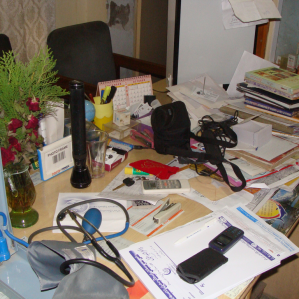

In [3]:
# messy room
Image.open("./input/images/images/train/messy/73.png")

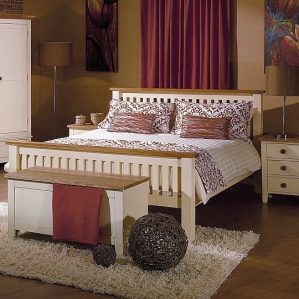

In [4]:
# clean room
Image.open("./input/images/images/train/clean/73.png")


# Converting To Grayscale

In [5]:
for image in tqdm(os.listdir(train_messy)):
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)

for image2 in tqdm(os.listdir(train_clean)):
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2 = np.asarray(img2)


100%|██████████| 96/96 [00:00<00:00, 108.97it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

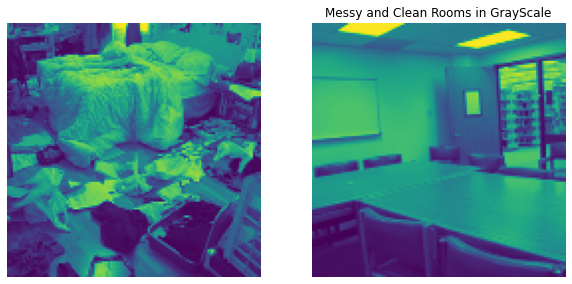

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')

plt.title("Messy and Clean Rooms in GrayScale")


# Train & Test Data

In [7]:
def train_data():
    train_data_messy = []
    train_data_clean = []

    for image1 in tqdm(os.listdir(train_messy)):
        path = os.path.join(train_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1)

    for image2 in tqdm(os.listdir(train_clean)):
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2)

    train_data = np.concatenate((np.asarray(train_data_messy), np.asarray(train_data_clean)), axis=0)
    return train_data


In [8]:
def test_data():
    test_data_messy = []
    test_data_clean = []

    for image1 in tqdm(os.listdir(test_messy)):
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1)
        
    for image2 in tqdm(os.listdir(test_clean)):
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2)

    test_data = np.concatenate((np.asarray(test_data_messy), np.asarray(test_data_clean)), axis=0)
    return test_data


In [9]:
train_data = train_data()
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 106.39it/s]


In [10]:
x_data = np.concatenate((train_data, test_data))
x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

# Extracting the Dimensions

In [11]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)

z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)


In [12]:
y_data = np.concatenate((Y_train, Y_test), axis=0).reshape(x_data.shape[0], 1)

In [13]:
print("X shape: ", x_data.shape)
print("Y shape: ", y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [14]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.15, random_state=42)

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [15]:
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test, x_test.shape[1]*x_test.shape[2])

print("X_train flatten : ", x_train_flatten.shape)
print("X_test flatten : ", x_test_flatten.shape)

X_train flatten :  (180, 16384)
X_test flatten :  (32, 16384)


In [16]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T

print("x-train: ", x_train.shape)
print("x-test: ", x_test.shape)
print("y-train: ", y_train.shape)
print("y-test: ", y_test.shape)

x-train:  (16384, 180)
x-test:  (16384, 32)
y-train:  (1, 180)
y-test:  (1, 32)


# Custom Implementation of Logistic Regression 

In [17]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head


def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b


def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                "derivative_bias": derivative_bias}
    return cost, gradients


def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iteration):

        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        w -=  learning_rate * gradients["derivative_weight"]
        b -=  learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction


def logistic_regression(x_train, y_train, x_test, y_test, learning_rate,  num_iterations):

    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100, 2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100, 2)))

## Running the logistic regression model & plotting the costs during the optimization process

Cost after iteration 0: nan
Cost after iteration 100: 3.470276
Cost after iteration 200: 1.929275
Cost after iteration 300: 0.167803
Cost after iteration 400: 2.322963
Cost after iteration 500: 0.060439
Cost after iteration 600: 0.043103
Cost after iteration 700: 0.035980
Cost after iteration 800: 0.031707
Cost after iteration 900: 0.028702
Cost after iteration 1000: 0.026406
Cost after iteration 1100: 0.024559
Cost after iteration 1200: 0.023022
Cost after iteration 1300: 0.021711
Cost after iteration 1400: 0.020572


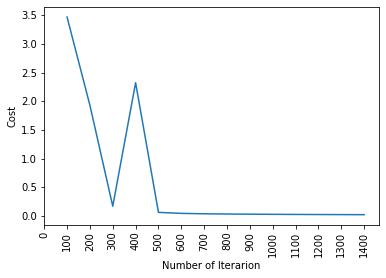

Test Accuracy: 68.75 %
Train Accuracy: 100.0 %


In [18]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate=0.01, num_iterations=1500)

# Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [20]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
print(grid)

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']}


In [21]:
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression, grid, cv=10)
log_reg_cv.fit(x_train.T, y_train.T)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [22]:
print("Best hyperparameters: ", log_reg_cv.best_params_)
print("Accuracy of Model: ", log_reg_cv.best_score_)

Best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Accuracy of Model:  0.75


# Training the model again with best hyperparameters

In [23]:
log_reg = LogisticRegression(C=0.001, penalty="l2")
log_reg.fit(x_train.T, y_train.T)


LogisticRegression(C=0.001)

In [24]:
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.875 
train accuracy: 0.8444444444444444 


# Logistic-Regression (Sklearn)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 16384), (180, 1), (32, 16384), (32, 1))

In [27]:
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
model.score(x_test, y_test)

0.53125

In [29]:
model.predict(x_test[:10])


array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
y_test[:10]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

# Checking sample images

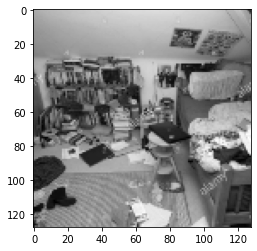

In [31]:
plt.imshow(x_test[0].reshape(128, 128), cmap='gray')
plt.show()

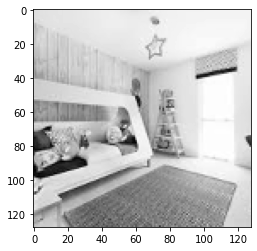

In [32]:
plt.imshow(x_test[2].reshape(128, 128), cmap='gray')
plt.show()